### Economic Analysis with Fred and Pandas
https://www.youtube.com/watch?v=R67XuYc9NQ4

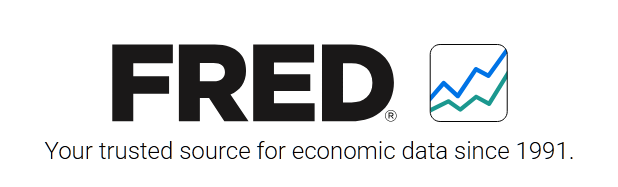

In [1]:
# importing the good stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500) # change the default columns display for the work
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color'] # set the colors

from fredapi import Fred # importing Agent Fred
with open("fred_api_key.txt", "r") as f: # Get Agent Fred his badge and gun
    fred_key = f.read().strip()


### 1. Create the Fred Object

In [2]:
fred = Fred(api_key=fred_key) # Agent Fred Lock and Loaded

### 2. Search for Economic Data

In [3]:
sp500 = fred.get_series('SP500') # Agent Fred test run

### 3. Plot the Data 

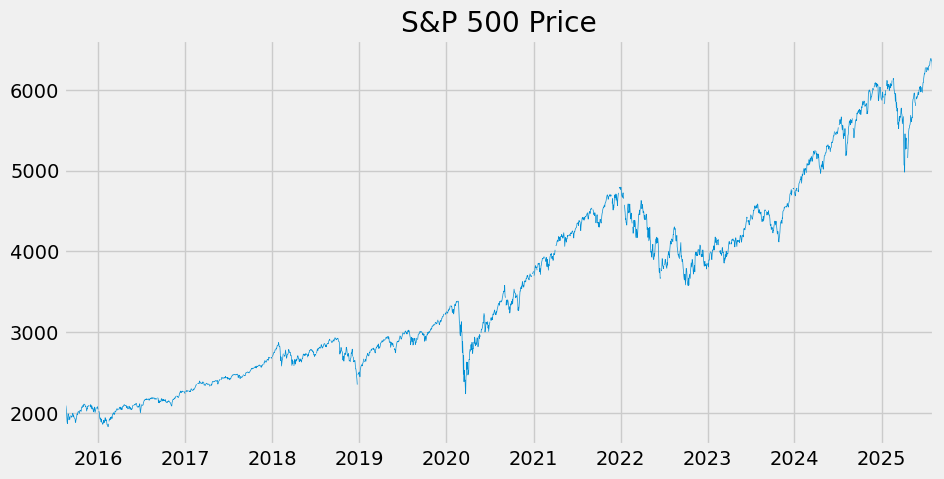

In [4]:
sp500.plot( figsize=(10,5) , title='S&P 500 Price' , lw = 0.5 )
plt.show() # the Agent is working perfectly

### 4. Pull and Join multiple Data Series

In [5]:
unemp_df = fred.search('unemployment rate state ' , filter=('frequency' , 'Monthly')) # search for unemployment data with filters

unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') # filter the search results for "Seasonally Adjusted" and "Percent"
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')] # filtering it again to get only Unemployment Rate data
unemp_df = unemp_df.loc[unemp_df['id'].str.len() == 4] # fitlering it so we can get only the states data
all_results = [] # store the downloaded data of every state inside a list of series
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
unemp_states = pd.concat(all_results , axis = 1 ) # concat that shit horizonaly so we can get the time on the x_axis and states on the Y_axis

id_to_state  = unemp_df['title'].str.replace('Unemployment Rate in ','').to_dict() # get the state names with their indexes
unemp_states.columns = [id_to_state[c] for c in unemp_states.columns] # turn the id numbers to states

### UR per State on FRED

In [6]:
px.line(unemp_states) # plotting every state their Unemployment Rate

### Pull April 2020 UR per State

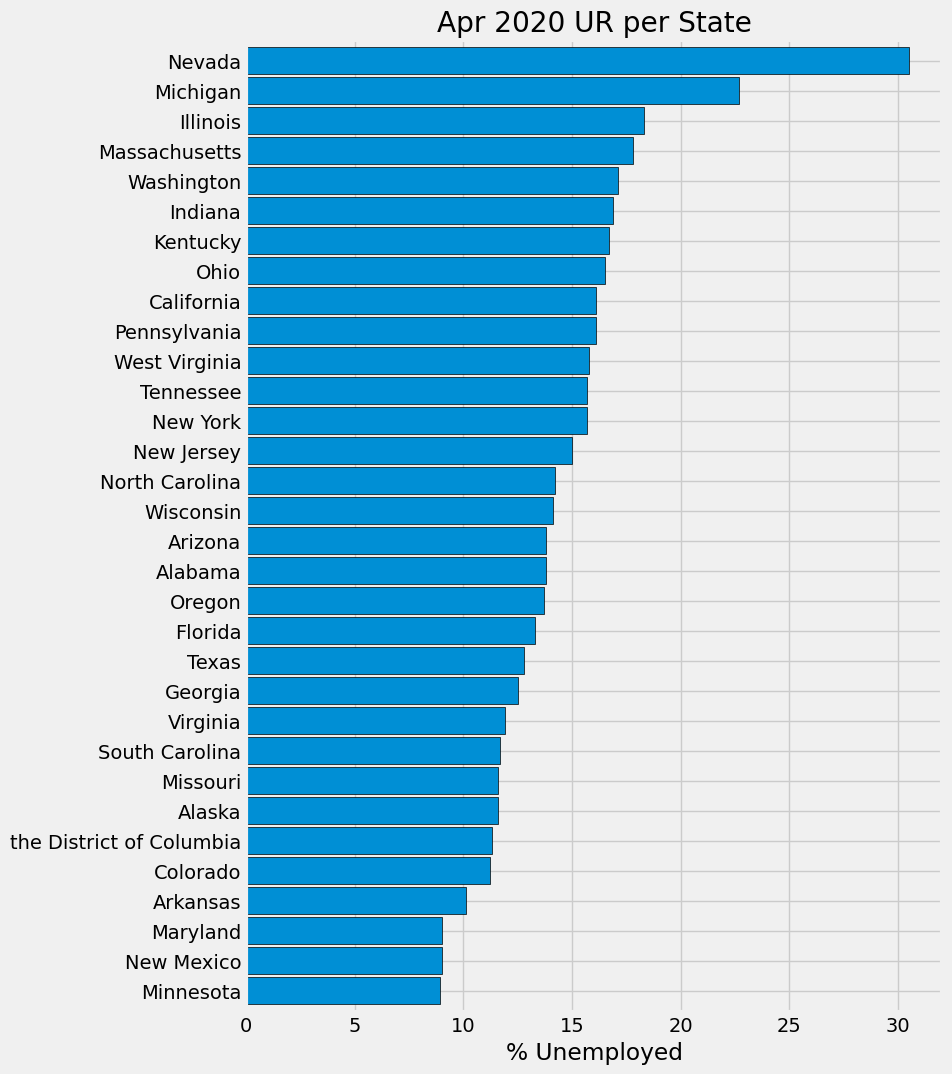

In [10]:

# 1- get the data based on date
# 2- flip that shit so the states on the X and the Unemployment rate on the Y
# 3- sort that shit based on the column name that i got
# 4- plot it horizontally so it is easy to read
# 5- final touches and Baaam

ax = unemp_states[unemp_states.index == '2020-04-01'] \
    .T.sort_values('2020-04-01') \
    .plot(kind='barh', figsize=(8, 12), title='Apr 2020 UR per State' , width = 0.9 , edgecolor = 'black')

ax.set_xlabel('% Unemployed')
ax.get_legend().remove()

plt.show()


### Pull Participation Rate

In [8]:
part_df = fred.search('participation rate state ' , filter=('frequency' , 'Monthly')) # same shit , searching .....
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"') # filtering ....
part_df = part_df.loc[part_df['title'].str.contains('Labor Force Participation Rate for ')] # more filtering ...
part_id_to_state  = part_df['title'].str.replace('Labor Force Participation Rate for ','').to_dict() # getting the names of the states with their id
all_results = [] # store every data inside a list
for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name = myid)
    all_results.append(results)
part_states = pd.concat(all_results , axis = 1 ) # concating it just like previous work
part_states.columns = [part_id_to_state[c] for c in part_states.columns] # id get kicked out , hello state names

### Unemployment vs Participation rate per state

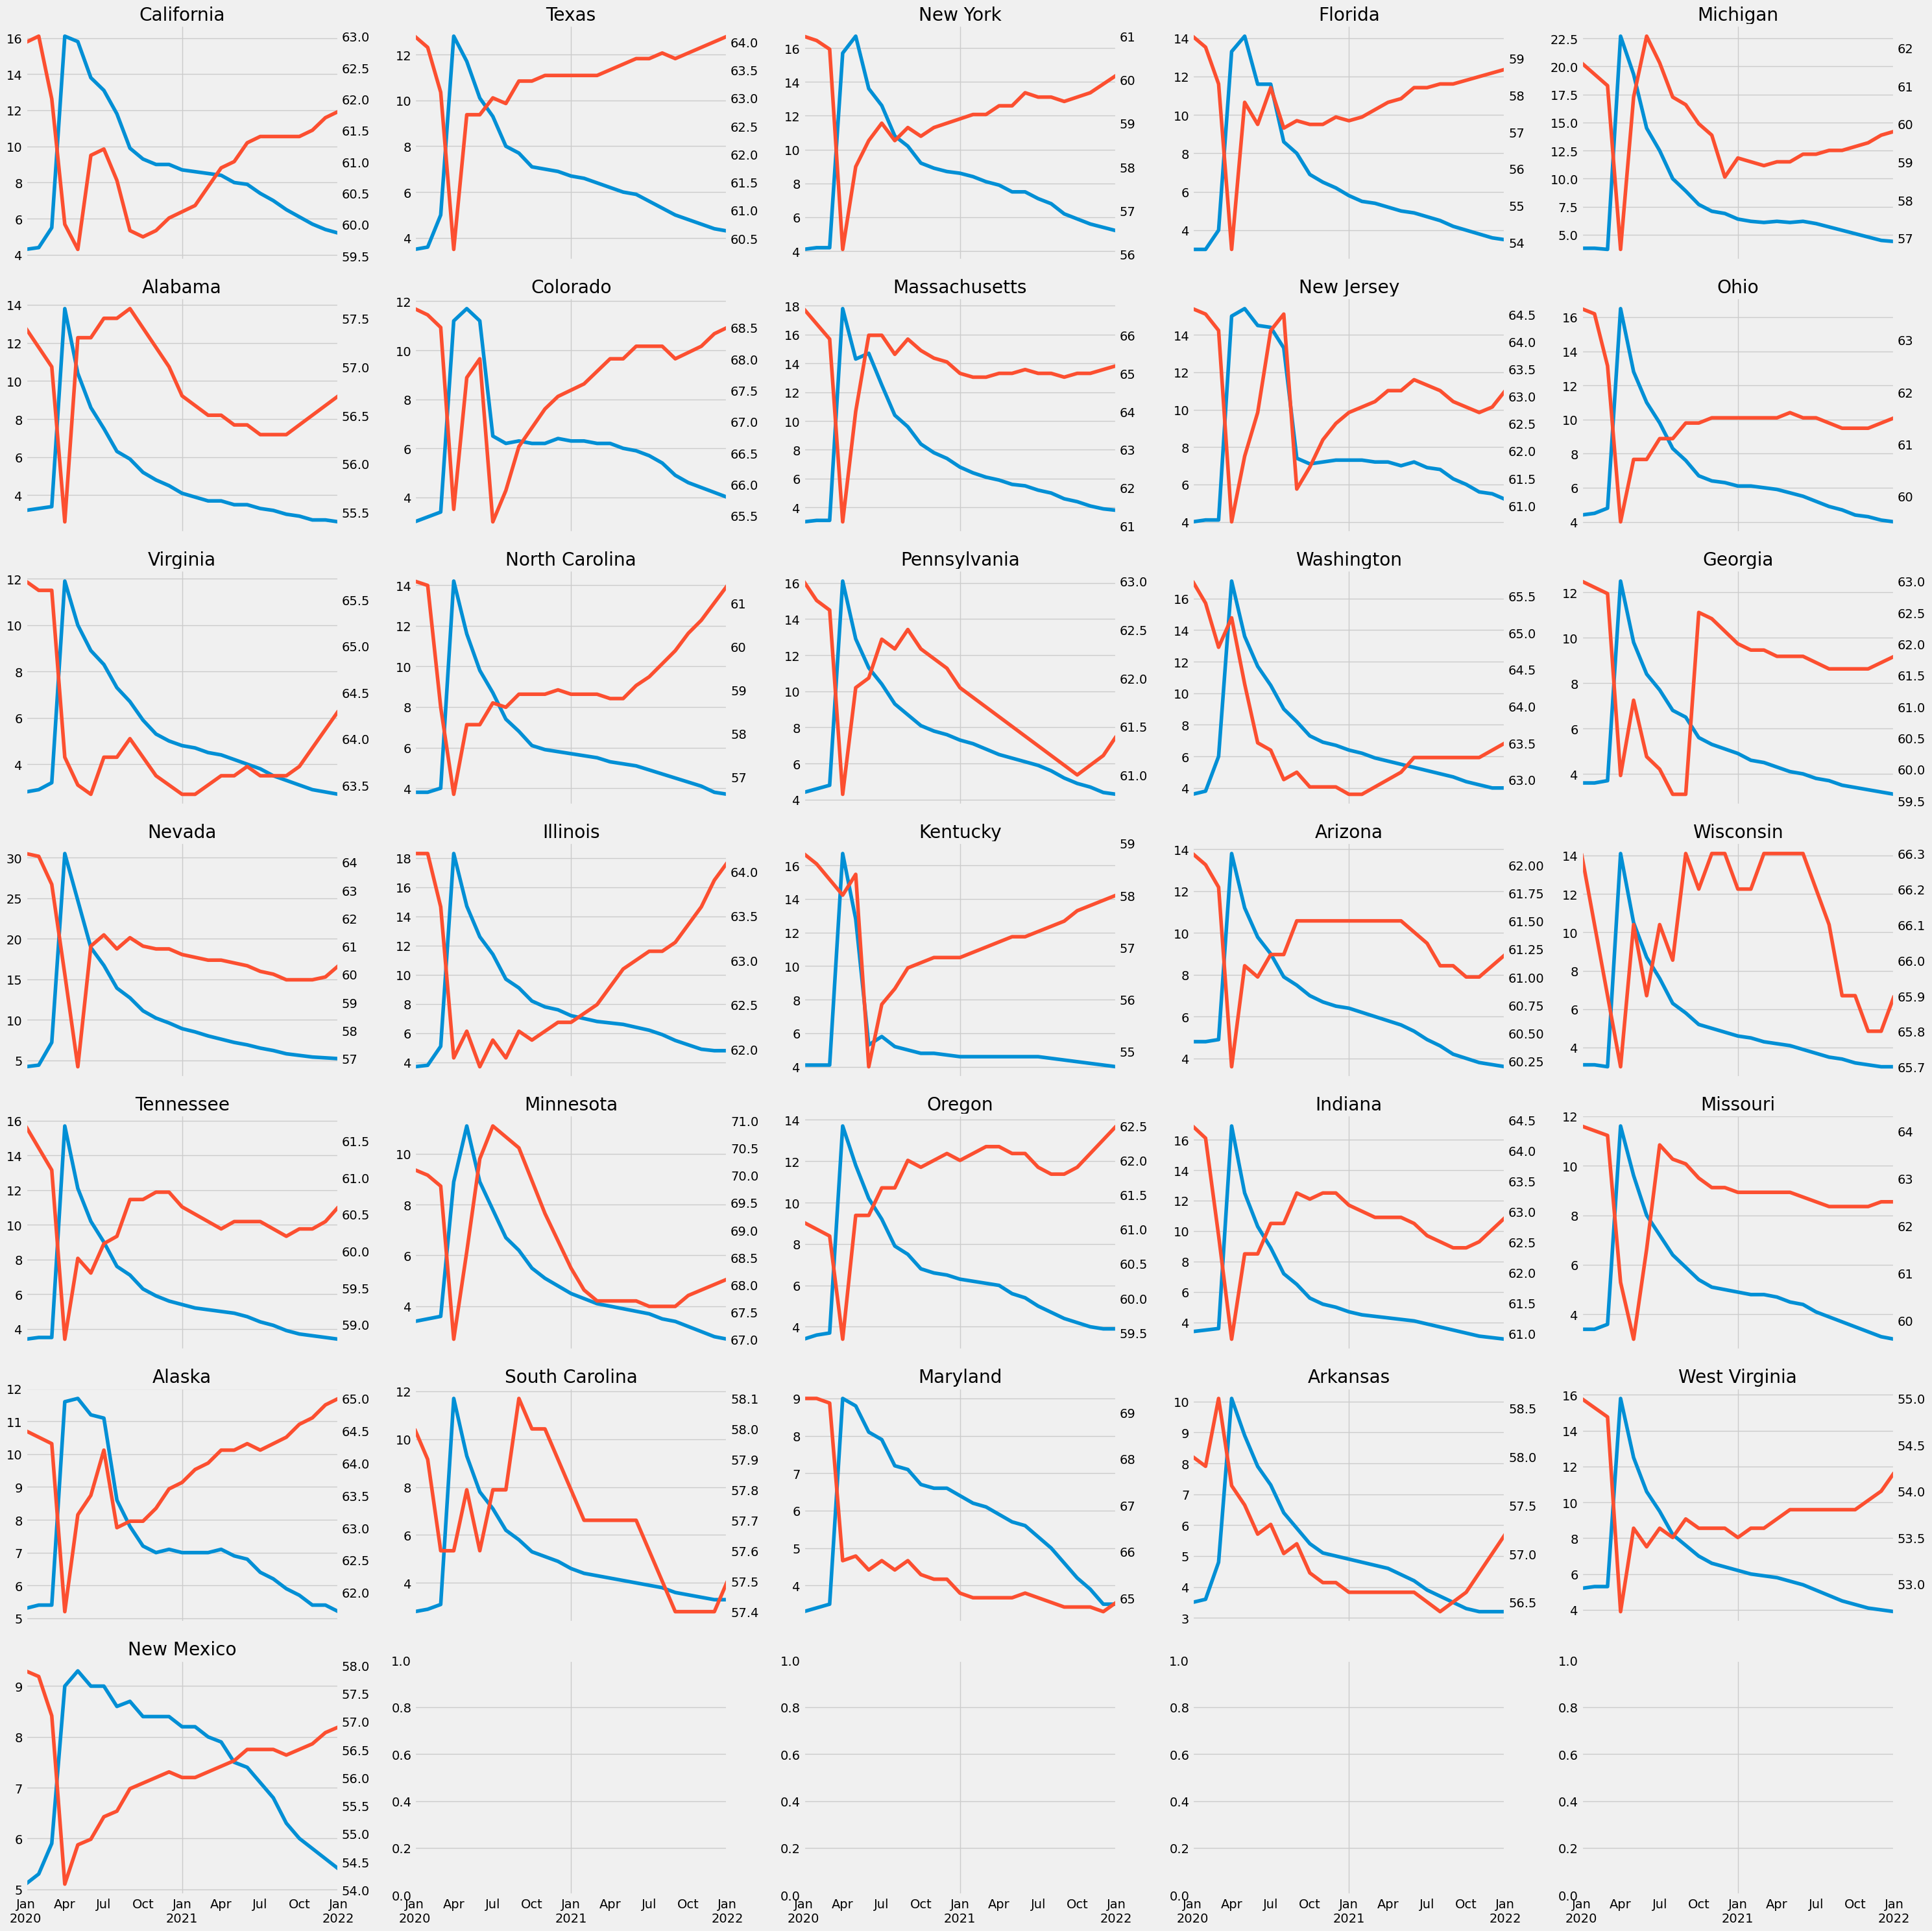

In [9]:
fig, axs = plt.subplots(7, 5, figsize=(30, 30) , sharex=True) # create 35 plot seats
axs = axs.flatten() # turn the 2d array navigation to 1d array navigation
common_cols = list(unemp_states.columns.intersection(part_states.columns)) # get the correct states name to avoid shit code errors

for i, state in enumerate(common_cols):
    ax = axs[i]  # get plot seat number
    ax2 = ax.twinx() # create his evil twin brother

    unemp_states.query('index >= 2020 and index <= 2022')[state].plot(ax=ax, label='Unemployment') # put the bad boy on the left
    part_states.query('index >= 2020 and index <= 2022')[state].plot(ax=ax2, label='Participation', color=color_pal[1]) # put the good boy on the right

    ax2.grid(False) # fuck off grid , it makes the scence ugly
    ax.set_title(state) # set every plot with their state name

plt.tight_layout()
plt.show() # enjoy the show
